### Problem Statement

You work for a company that sell sculptures that are acquired from various artist around world.Your task is to predict the cost required to ship those sculptures to the customers based on various variable present in dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("../data/train.csv")

In [83]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [84]:
df.shape

(6500, 20)

### Summary of Dataset

In [85]:
df.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


#### Stastical Inference
- Mean price of Sculpture is 1192.
- 25% of population price is below 5.
- The average artist reputation of the population is 0.46

In [86]:
df.dtypes

Customer Id               object
Artist Name               object
Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information      object
Remote Location           object
Scheduled Date            object
Delivery Date             object
Customer Location         object
Cost                     float64
dtype: object

### Exploring Data

In [87]:
target_feature = 'Cost'

In [88]:
numeric_feature = df.dtypes[df.dtypes != 'object'].index.tolist()
categorical_feature = df.dtypes[df.dtypes =='object'].index.tolist()

print(f"we have {len(numeric_feature)} numeric features: {numeric_feature}")
print(f"we have {len(categorical_feature)} categorical features: {categorical_feature}")

we have 7 numeric features: ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price', 'Cost']
we have 13 categorical features: ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


### Univariate Analysis

#### Numerical Features

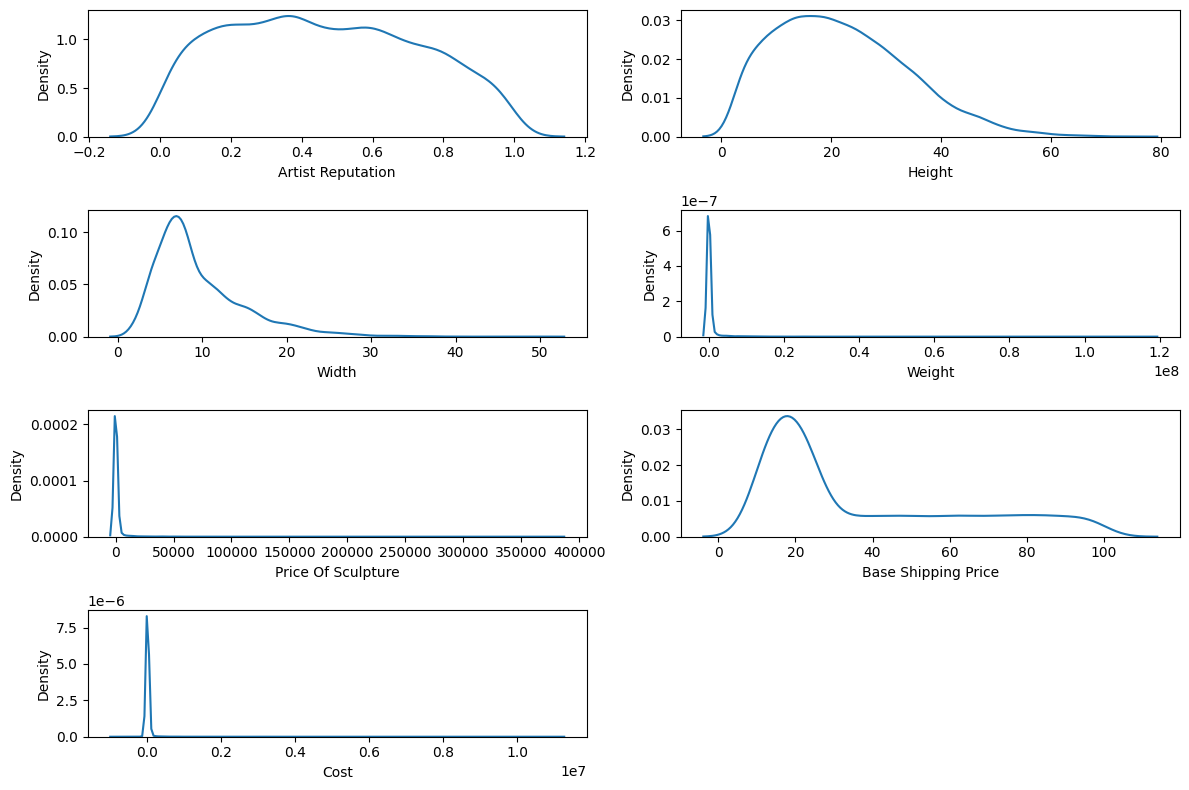

In [ ]:
plt.figure(figsize=(12,8))
for i in range(0,len(numeric_feature)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=df[numeric_feature[i]])
    plt.tight_layout()

#### Categorical features

In [90]:
df[categorical_feature].nunique()

Customer Id              6500
Artist Name              6449
Material                    7
International               2
Express Shipment            2
Installation Included       2
Transport                   3
Fragile                     2
Customer Information        2
Remote Location             2
Scheduled Date           1660
Delivery Date            1664
Customer Location        6500
dtype: int64

In [91]:
categorical_columns = []
for i in categorical_feature:
    print(i,df[i].nunique())
    if df[i].nunique() < 10:
        categorical_columns.append(i)

Customer Id 6500
Artist Name 6449
Material 7
International 2
Express Shipment 2
Installation Included 2
Transport 3
Fragile 2
Customer Information 2
Remote Location 2
Scheduled Date 1660
Delivery Date 1664
Customer Location 6500


In [92]:
categorical_columns

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

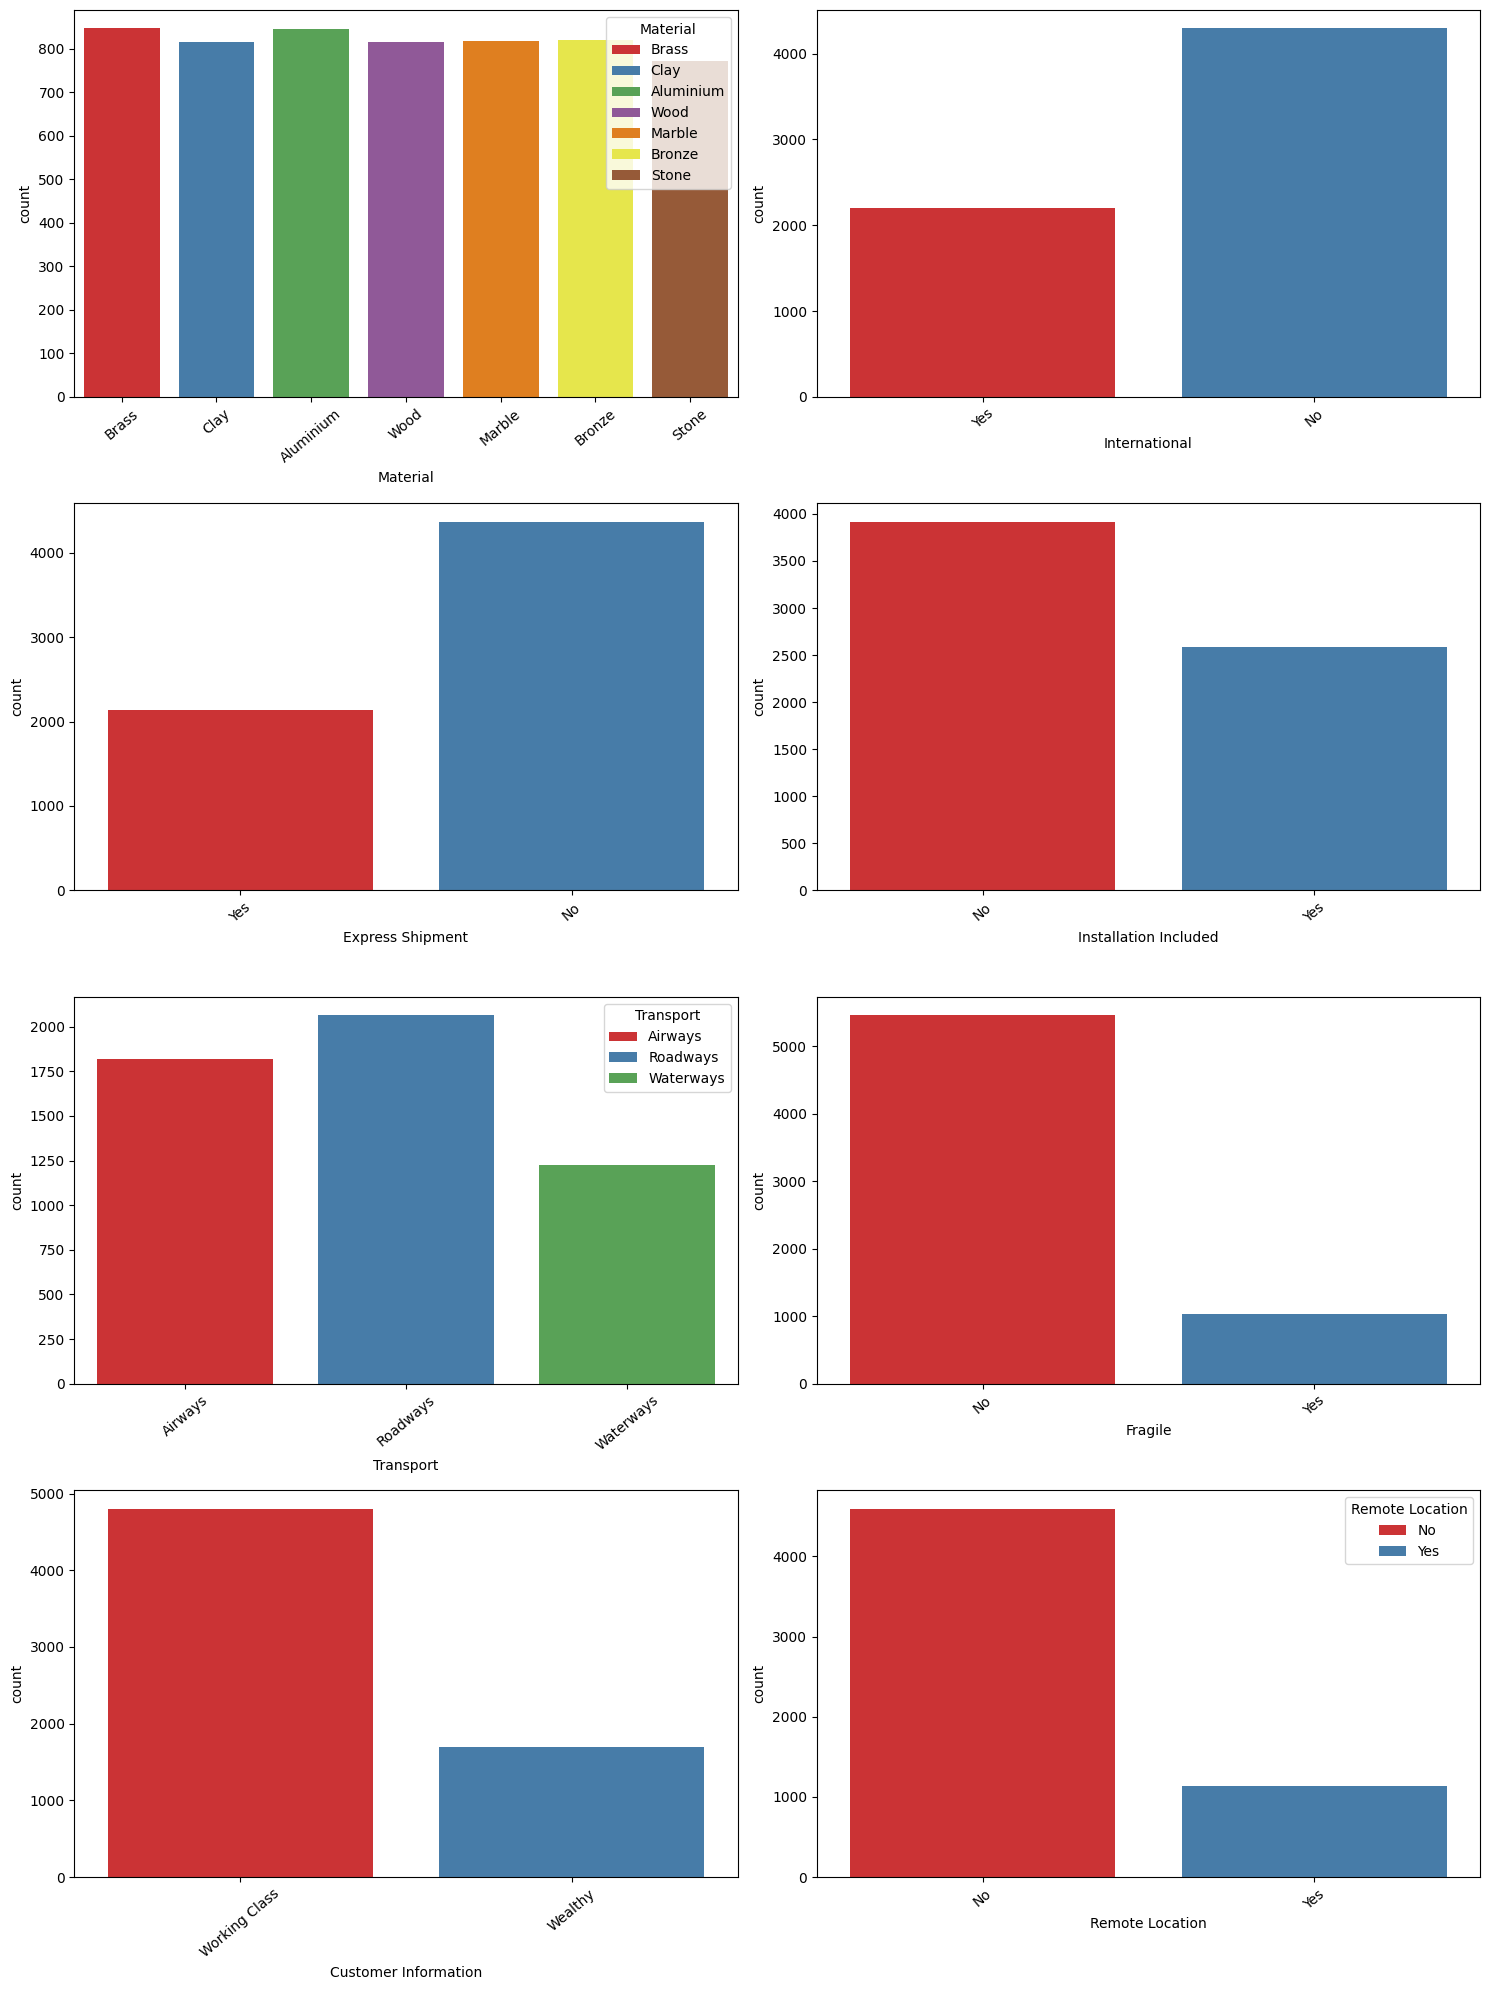

In [93]:
plt.figure(figsize=(15,20))
for i in range(0,len(categorical_columns)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=categorical_columns[i],data = df,hue=categorical_columns[i],palette='Set1')
    plt.xlabel(categorical_columns[i])
    plt.xticks(rotation=40)
    plt.tight_layout()

### Multivariate Analysis

#### Heat Map

<Axes: >

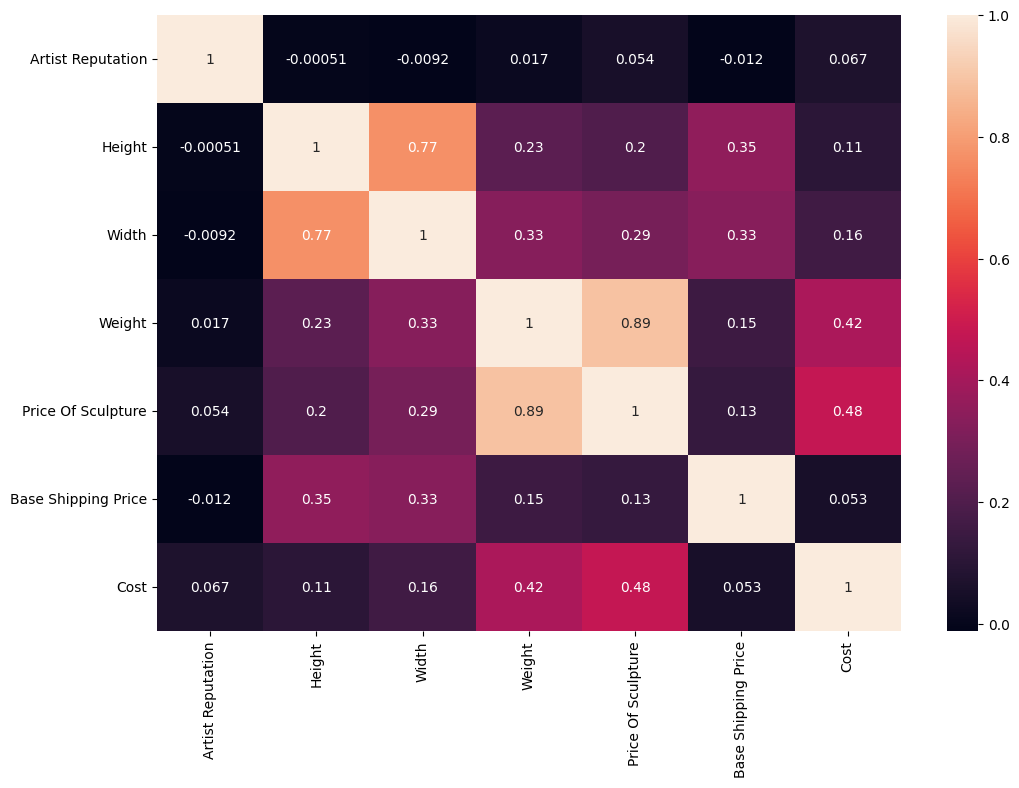

In [94]:
plt.figure(figsize=(12,8))
# mask = np.triu(np.ones_like(df[numeric_feature].corr(),dtype=bool))
sns.heatmap(data = df[numeric_feature].corr(),annot=True)

#### Relation b/w target variable and numerical features

In [95]:
numeric_feature

['Artist Reputation',
 'Height',
 'Width',
 'Weight',
 'Price Of Sculpture',
 'Base Shipping Price',
 'Cost']

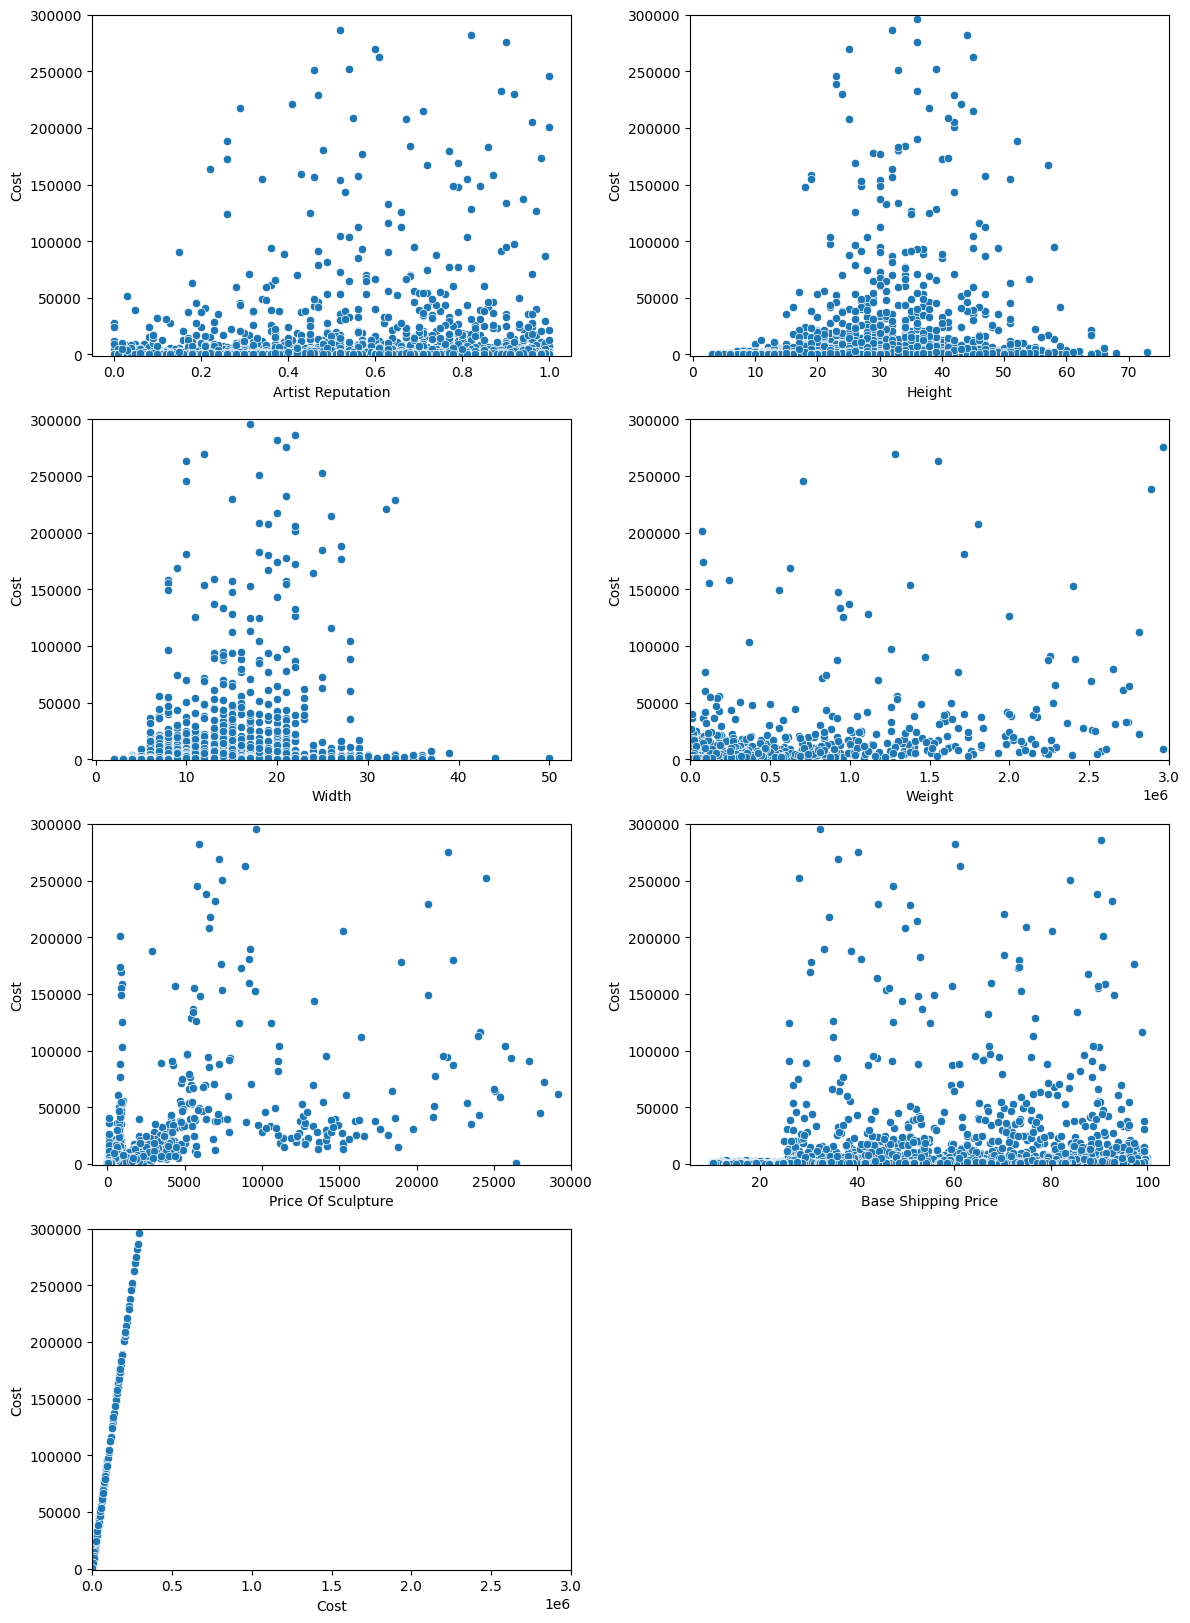

In [96]:
plt.figure(figsize=(12,24))
for i in range(0,len(numeric_feature)):
    ax = plt.subplot(6,2,i+1)
    sns.scatterplot(data=df,x=numeric_feature[i],y=target_feature)
    if df[numeric_feature[i]].max() > 30000:
        plt.xlim(-1000,30000)
    if df[numeric_feature[i]].max() > 3000000:
        plt.xlim(-1000,3000000)
    plt.ylim(-1000, 300000)
    plt.tight_layout()

### Visualizing independent column

##### Target Feature

(-50000.0, 300000.0)

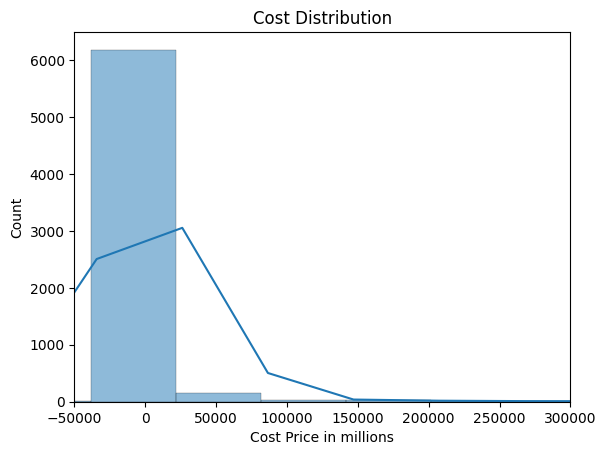

In [97]:
sns.histplot(data = df,x=target_feature,bins=200,kde=True)
plt.title('Cost Distribution')
plt.xlabel('Cost Price in millions')
plt.xlim(-50000,300000)


sns.boxplot(data=df,x=target_feature)
plt.title('Cost Distribution')
plt.xlabel('Cost Price in millions')
plt.xlim(-50000,400000)


#### How Various Variables affecting the Cost of Shipment?

In [99]:
categorical_columns

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location']

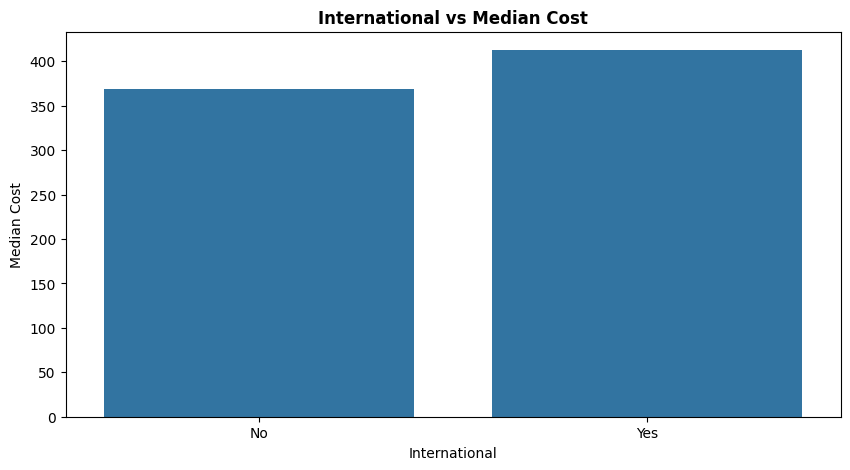

Value counts for column 'International':
International
No     4294
Yes    2206
Name: count, dtype: int64

--------------------------------------------------

Difference in median cost for International: 43.92

--------------------------------------------------



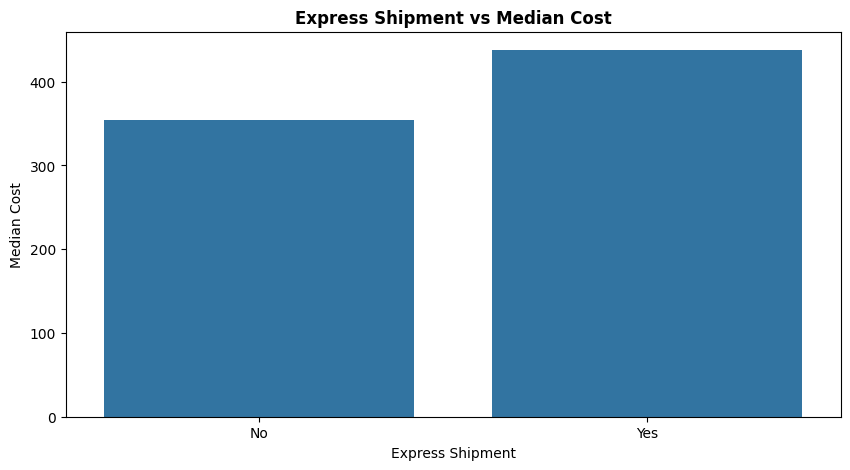

Value counts for column 'Express Shipment':
Express Shipment
No     4365
Yes    2135
Name: count, dtype: int64

--------------------------------------------------

Difference in median cost for Express Shipment: 83.08

--------------------------------------------------



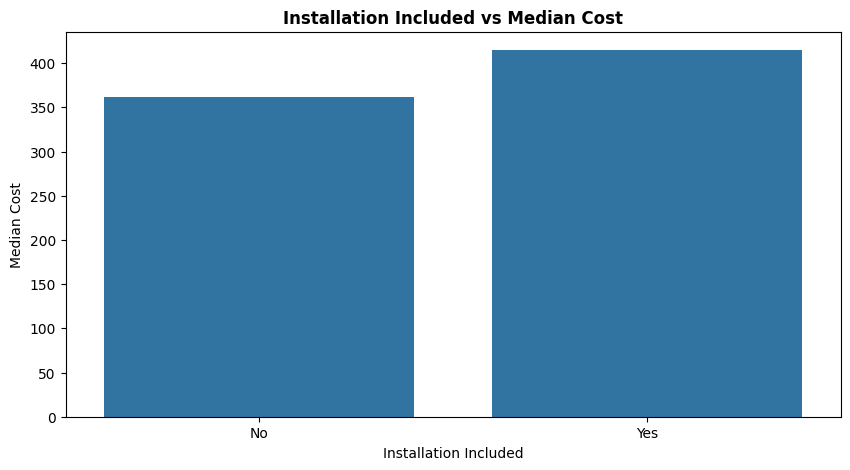

Value counts for column 'Installation Included':
Installation Included
No     3916
Yes    2584
Name: count, dtype: int64

--------------------------------------------------

Difference in median cost for Installation Included: 53.68

--------------------------------------------------



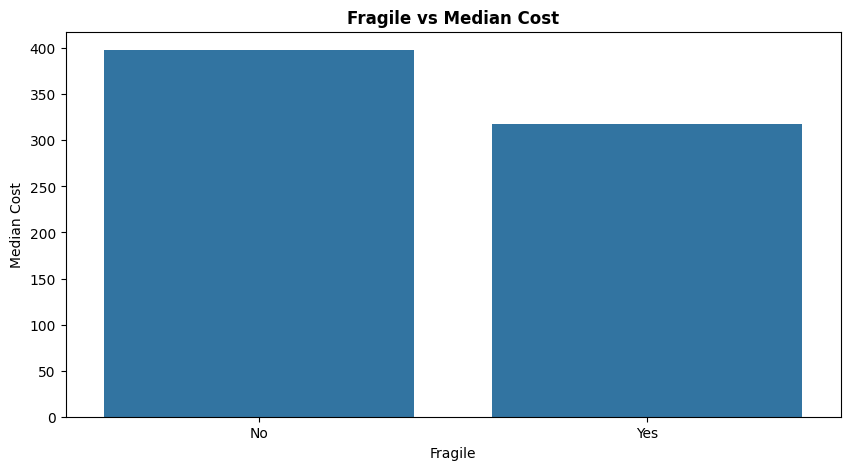

Value counts for column 'Fragile':
Fragile
No     5461
Yes    1039
Name: count, dtype: int64

--------------------------------------------------

Difference in median cost for Fragile: -80.03

--------------------------------------------------



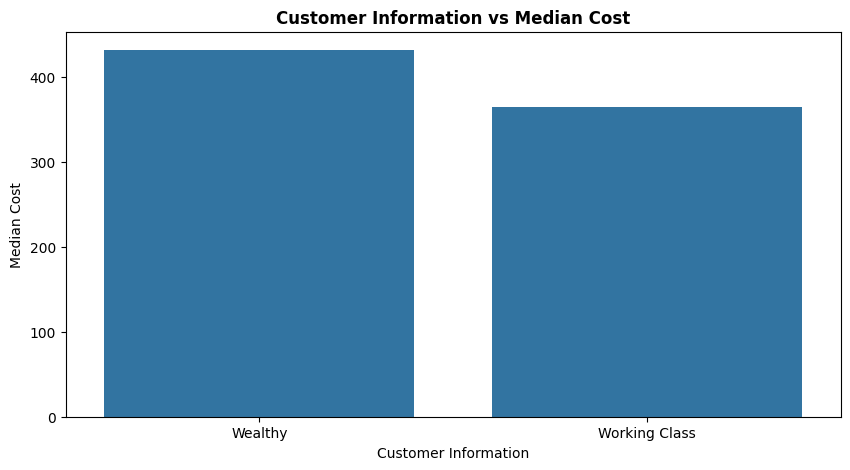

Value counts for column 'Customer Information':
Customer Information
Working Class    4803
Wealthy          1697
Name: count, dtype: int64

--------------------------------------------------

Difference in median cost for Customer Information: -66.94

--------------------------------------------------



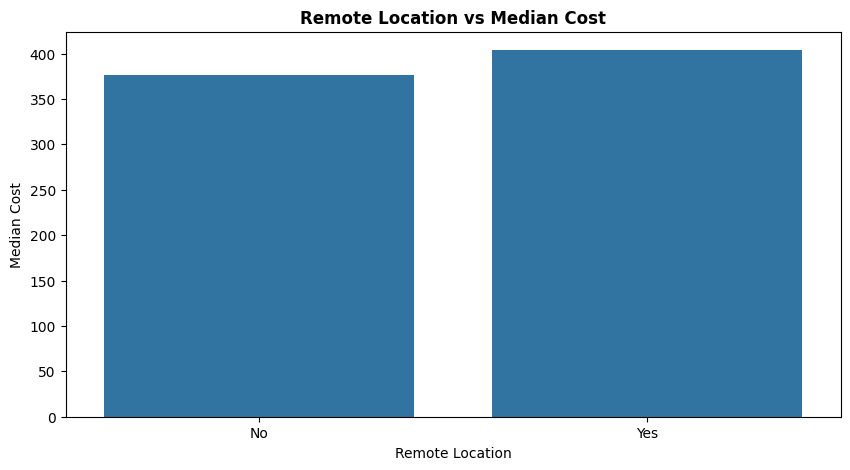

Value counts for column 'Remote Location':
Remote Location
No     4594
Yes    1135
Name: count, dtype: int64

--------------------------------------------------

Difference in median cost for Remote Location: 27.71

--------------------------------------------------



In [100]:
for col in categorical_columns:
   unique_vals = df[col].dropna().unique()
   if len(unique_vals) != 2:
      continue
   medians = df.groupby(col)[target_feature].median().to_frame(name='median_cost')

   plt.figure(figsize=(10,5))
   sns.barplot(x=col,y='median_cost',data=medians,)
   plt.title(f"{col} vs Median Cost",weight='bold')
   plt.xlabel(col)
   plt.ylabel('Median Cost')
   plt.show()

   print(f"Value counts for column '{col}':")
   print(df[col].value_counts())
   print('\n' + '-'*50 + '\n')

   median_values = df.groupby(col)[target_feature].median()
   if len(median_values) == 2:
      diff = median_values.iloc[1] - median_values.iloc[0]
      message = f"Difference in median cost for {col}: {diff:.2f}"
   else:
      message = f"Insufficient categories to compute median difference for {col}"
   print(message)
   print('\n' + '-' * 50 + '\n')


### Visualizing Date Column

In [101]:
df['Scheduled Date']=pd.to_datetime(df['Scheduled Date'])
df['Delivery Date']=pd.to_datetime(df['Delivery Date'])

C:\Users\harsh\AppData\Local\Temp\ipykernel_13752\1617855400.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Scheduled Date']=pd.to_datetime(df['Scheduled Date'])
C:\Users\harsh\AppData\Local\Temp\ipykernel_13752\1617855400.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Delivery Date']=pd.to_datetime(df['Delivery Date'])


In [ ]:
df['Year']=pd.DatetimeIndex(df['Scheduled Date']).year
df['Month']=pd.DatetimeIndex(df['Scheduled Date']).month

In [104]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Year,Month
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,...,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29,2015,6
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,...,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96,2017,3
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,...,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29,2015,3
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,...,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16,2015,5
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,...,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23,2016,12


In [111]:
x = df.groupby(['Year','Month'])['Cost'].mean()
x


Year  Month
2015  1          1243.620800
      2         34249.351818
      3         23775.741185
      4         94668.648276
      5         15884.313833
      6          4480.208318
      7          1426.520159
      8         17085.121760
      9          4258.188871
      10         4979.386768
      11        53043.073800
      12        40081.836509
2016  1         12930.272703
      2         10034.132545
      3         10757.195810
      4          4288.732696
      5          4103.283514
      6         12773.907113
      7          5375.828978
      8         10069.254050
      9         20046.773929
      10        20613.512273
      11         7505.164333
      12         2370.201793
2017  1         13388.419779
      2          3427.163673
      3         41359.835804
      4         26634.491452
      5          8857.153077
      6        121282.754000
      7         36597.400391
      8         -3546.622946
      9          1854.061058
      10        10443.433304
  

In [114]:
df_wide = x.unstack().T
df_wide

Year,2015,2016,2017,2018,2019
Month,,,,,
1,1243.620800,12930.272703,13388.419779,47457.768519,2430.550495
2,34249.351818,10034.132545,3427.163673,6612.238687,3840.484630
3,23775.741185,10757.195810,41359.835804,20026.385455,2265.834019
4,94668.648276,4288.732696,26634.491452,4138.730309,8374.422975
5,15884.313833,4103.283514,8857.153077,17461.434118,14129.902741
6,4480.208318,12773.907113,121282.754000,4633.838018,8488.073774
7,1426.520159,5375.828978,36597.400391,6444.235526,9625.383254
8,17085.121760,10069.254050,-3546.622946,5935.121864,5167.774894
9,4258.188871,20046.773929,1854.061058,26486.177731,NaN


C:\Users\harsh\AppData\Local\Temp\ipykernel_13752\2506981576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_wide,y=i,x=df_wide.index,palette='Set1')
C:\Users\harsh\AppData\Local\Temp\ipykernel_13752\2506981576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_wide,y=i,x=df_wide.index,palette='Set1')
C:\Users\harsh\AppData\Local\Temp\ipykernel_13752\2506981576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_wide,y=i,x=df_wide.index,palette='Set1')
C:\Users\harsh\AppData\Local\Temp\ipykernel_13752\2506981576.

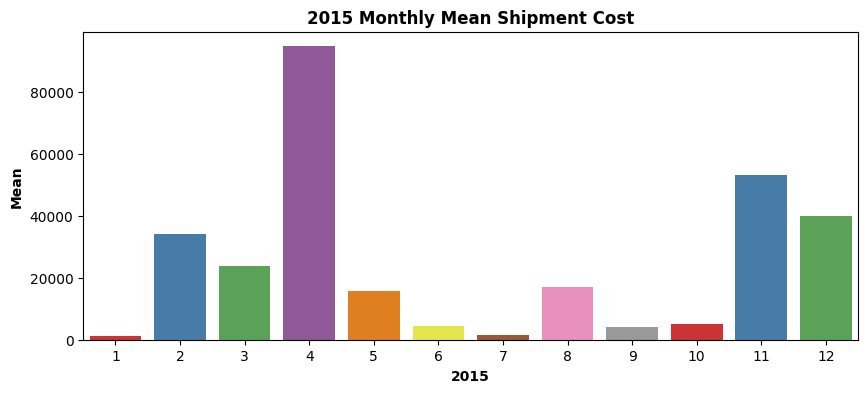

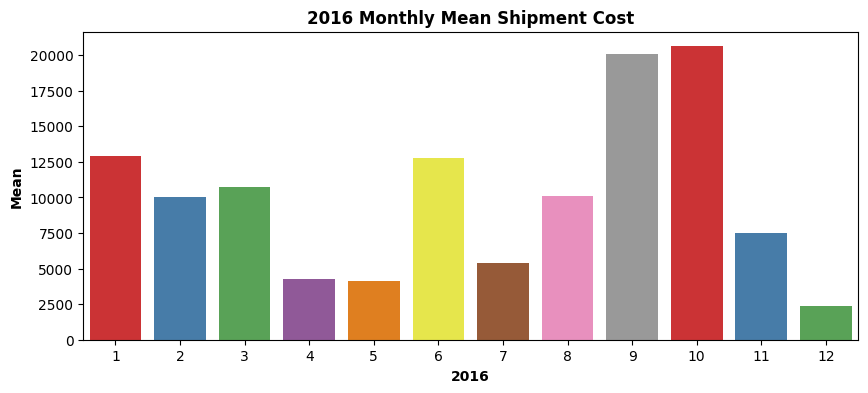

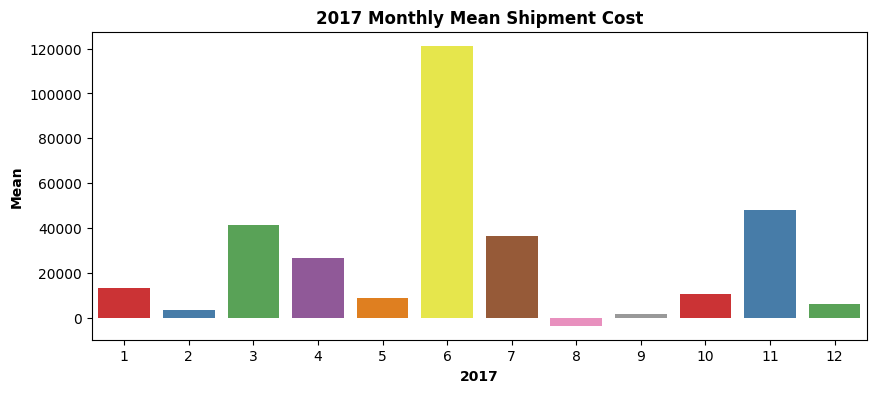

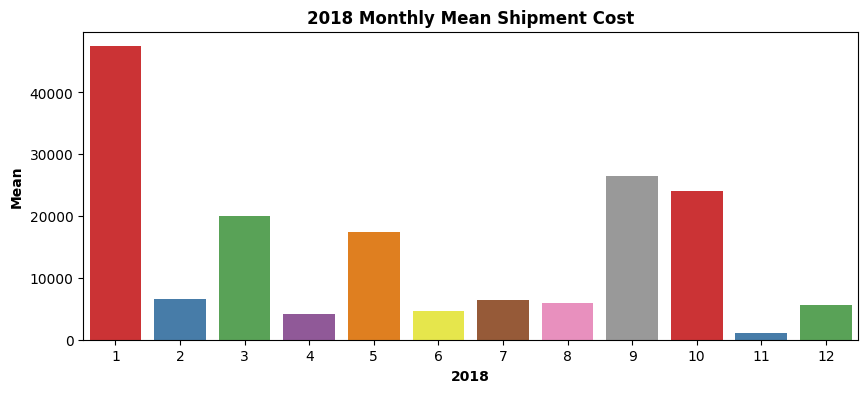

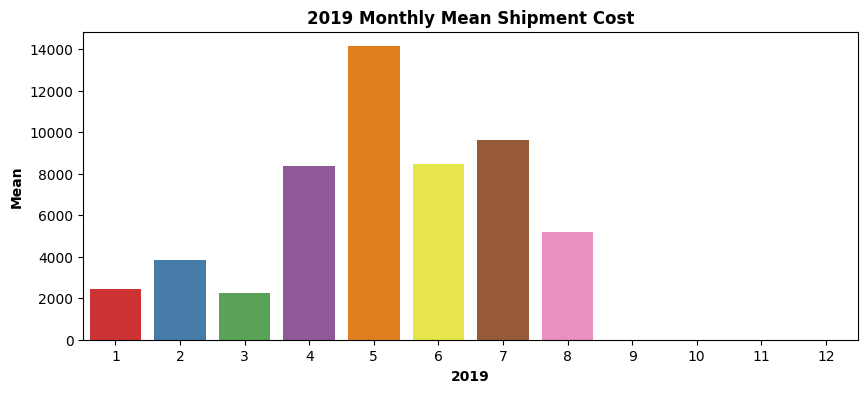

In [130]:
for i in df_wide.columns:
    plt.figure(figsize=(10,4))
    sns.barplot(data=df_wide,y=i,x=df_wide.index,palette='Set1')
    plt.title(f"{i} Monthly Mean Shipment Cost",weight='bold')
    plt.xlabel(i,weight='bold')
    plt.ylabel("Mean",weight="bold")
    

C:\Users\harsh\AppData\Local\Temp\ipykernel_13752\3959954424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Year',palette='Set1')


Text(0, 0.5, 'Count')

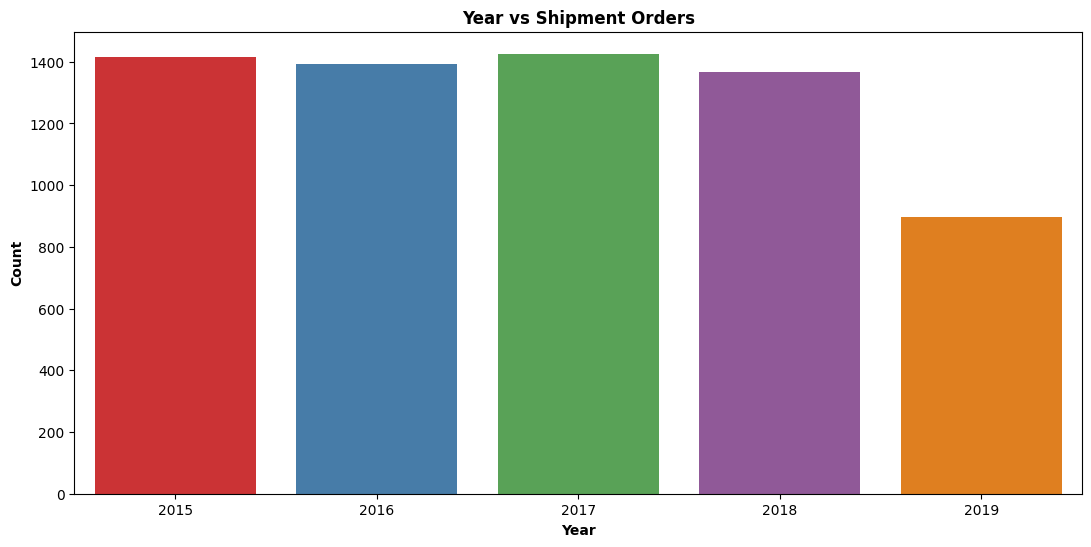

In [136]:
plt.figure(figsize=(13,6))
sns.countplot(data=df,x='Year',palette='Set1')
plt.title("Year vs Shipment Orders",weight="bold")
plt.xlabel("Year",weight='bold')
plt.ylabel("Count",weight='bold')

C:\Users\harsh\AppData\Local\Temp\ipykernel_13752\1117204200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Month',palette='Set1')


Text(0, 0.5, 'Mean Cost')

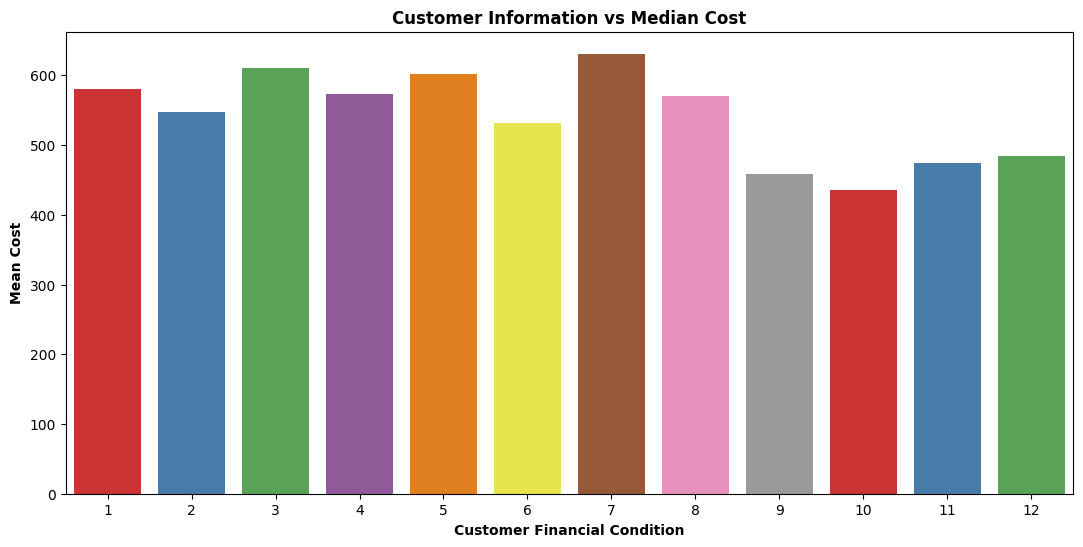

In [138]:
plt.figure(figsize=(13,6))
sns.countplot(data=df,x='Month',palette='Set1')
plt.title("Customer Information vs Median Cost",weight="bold")
plt.xlabel("Customer Financial Condition",weight='bold')
plt.ylabel("Mean Cost",weight='bold')